In [37]:
import scipy
import numpy as np
import random
import matplotlib.pyplot as plt

In [38]:
def coalescent(mu, K):
    T = [((0.0, 0, 0),[]) for i in range(K)]
    v = 1
    t = 0
    mut = K * mu
    h = np.math.factorial(K) / (np.math.factorial(2) * np.math.factorial(K - 2))
    coal = 1 / v * h
    rate = mut + coal
    mut_counter = 0
    ber = 0
    size = K
    coalescentions = []
    used = [0 for i in range(K)]
    while(True):
        pois = mut / (mut + coal)
        ber = np.random.binomial(1, pois)
        if ber == 1:
            l = random.randint(0, size - 1)
            while (used[l] == 1):
                l = random.randint(0, size - 1)
            p = random.random()
            T[l][1].append((p, mut_counter))
            mut_counter += 1
        else:
            t = t + np.random.exponential(rate)
            used += [0]
            l1 = random.randint(0, size - 1)
            while (used[l1] == 1):
                l1 = random.randint(0, size - 1)
            used[l1] = 1
            l2 = random.randint(0, size - 1)
            while ((l2 == l1) or (used[l2] == 1)):
                l2 -= 1
            t_s = t if mu == 0 else t / 3
            T.append(((t_s, min(l1 % size, l2 % size), max(l1 % size, l2 % size)), T[l1][1] + T[l2][1]))
            used[l2] = 1
            size += 1
            K -= 1
            coalescentions.append(t)
            if (K == 1):
                break
    mutations = np.zeros((size, mut_counter))
    for i in range(size):
        temp = [x[1] for x in T[i][1]]
        for z in range(len(temp)):
            mutations[i,temp[z]] = 1
    return T, mutations, coalescentions

In [39]:
res, muts, coals = coalescent(0, 5)

In [40]:
res

[((0.0, 0, 0), []),
 ((0.0, 0, 0), []),
 ((0.0, 0, 0), []),
 ((0.0, 0, 0), []),
 ((0.0, 0, 0), []),
 ((33.023978063584266, 1, 2), []),
 ((37.900332679168905, 3, 4), []),
 ((60.635128654826076, 0, 6), []),
 ((88.3385138963066, 6, 7), [])]

In [41]:
muts

array([], shape=(9, 0), dtype=float64)

In [42]:
coals

[33.023978063584266, 37.900332679168905, 60.635128654826076, 88.3385138963066]

In [43]:
def run_m_cromosomes(M, mu, K):
    coalescentions = []
    for i in range(M):
        _,_,coals_t = coalescent(mu, K)
        coalescentions += coals_t
    return coalescentions

In [44]:
def parse_file(filename, k):
    coals_file = []
    with open(filename, 'r') as f:
            for line in f:
                if '(' in line and ')' in line:
                    line = line[3:]
                    if k == 2:
                        t = line.split(',')
                        coals_file.append(float(t[0]) * 2)
                    if k == 3:
                        t = line.split(':')
                        coals_file.append(float(t[0][0:4]) * 10)
                        coals_file.append(float(t[2][0:4]) * 10)
                        coals_file.append(float(t[3][0:4]) * 10)
    return coals_file

In [83]:
def compare_with_ms(M, mu, filename, K):
    coalescentions = run_m_cromosomes(M, mu, K)
    counts, bins = np.histogram(coalescentions)
    print("Computed simulations for ", M, " chromosomes with mutation_rate ", mu, " and ", K, " lineages")
    plt.hist(bins[:-1], bins, weights=counts)
    plt.show()
    coals_file = parse_file(filename, K)
    counts, bins = np.histogram(coals_file)
    print("MS simulations for ", M, " chromosomes with mutation_rate ", mu, " and ", K, " lineages")
    plt.hist(bins[:-1], bins, weights=counts)
    plt.show()

Computed simulations for  100  chromosomes with mutation_rate  0  and  2  lineages


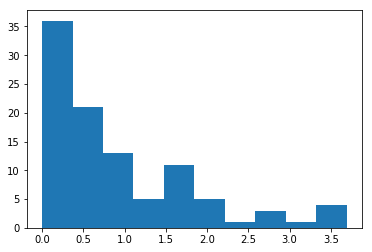

MS simulations for  100  chromosomes with mutation_rate  0  and  2  lineages


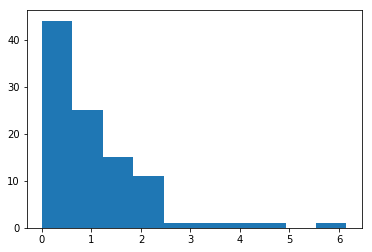

In [84]:
compare_with_ms(100, 0, 'ms100.txt', 2) #For 100 chromosomes and mutation_rate = 0

Computed simulations for  100000  chromosomes with mutation_rate  0  and  2  lineages


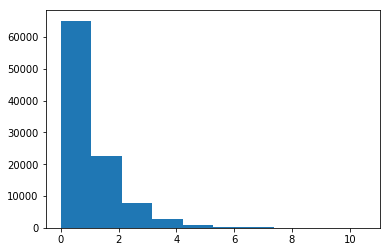

MS simulations for  100000  chromosomes with mutation_rate  0  and  2  lineages


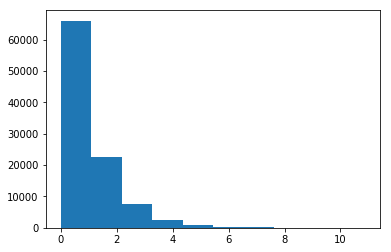

In [85]:
compare_with_ms(100000, 0, 'ms100000.txt', 2) #For 100000 chromosomes and mutation_rate = 0

Computed simulations for  100000  chromosomes with mutation_rate  1  and  2  lineages


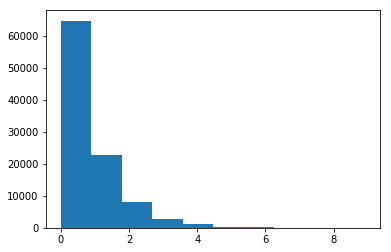

MS simulations for  100000  chromosomes with mutation_rate  1  and  2  lineages


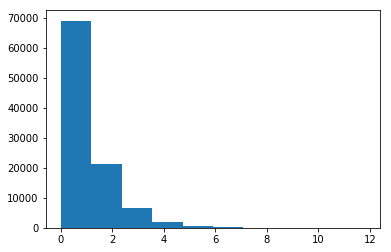

In [86]:
compare_with_ms(100000, 1, 'ms100000m.txt', 2) #For 100000 chromosomes and mutation_rate = 1

Computed simulations for  100000  chromosomes with mutation_rate  0  and  3  lineages


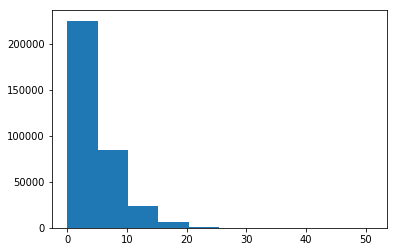

MS simulations for  100000  chromosomes with mutation_rate  0  and  3  lineages


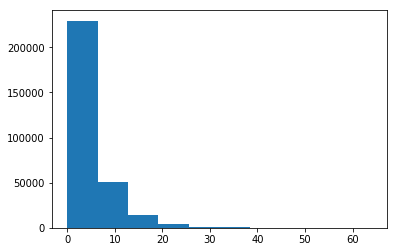

In [87]:
compare_with_ms(100000, 0, 'ms3.txt', 3) #For 100000 chromosomes and K = 3

In [88]:
res, muts, coals = coalescent(2, 5)

In [89]:
res

[((0.0, 0, 0), [(0.3158243434750747, 0)]),
 ((0.0, 0, 0), []),
 ((0.0, 0, 0), []),
 ((0.0, 0, 0), []),
 ((0.0, 0, 0), []),
 ((1.4664993086597562, 3, 4), []),
 ((9.6572131083633, 0, 1),
  [(0.3158243434750747, 0), (0.8276640704749398, 1), (0.6501107231970746, 2)]),
 ((8.802953950892464, 2, 5), [(0.7117621657260698, 3)]),
 ((4.342716805437946, 7, 7),
  [(0.7117621657260698, 3), (0.7117621657260698, 3)])]

In [16]:
muts

array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.]])